In [134]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict 
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [135]:
#Dictionary for genres label encoding:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [136]:
#cargo csvs:
data=pd.read_csv("./Features/features2.csv")#training data
t1data=pd.read_csv("./Features/features_test_1.csv")#test songs 1 row
t2data=pd.read_csv("./Features/features_test_2.csv")#test songs 2 rows


In [137]:
X=data.drop('genre',axis=1)
Xt1=t1data.drop('genre',axis=1)
Xt2=t2data.drop('genre',axis=1)

In [138]:
y=data.genre
yt1=t1data.genre
yt2=t2data.genre


In [139]:
scaled_features = StandardScaler().fit_transform(X.values)
sc1=StandardScaler().fit_transform(Xt1.values)
sc2=StandardScaler().fit_transform(Xt2.values)

X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
Xt1=pd.DataFrame(sc1, index=Xt1.index, columns=Xt1.columns)
Xt2=pd.DataFrame(sc2, index=Xt2.index, columns=Xt2.columns)


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
from keras import models
from keras import layers

model1 = models.Sequential()
model1.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model1.add(layers.Dense(128, activation='relu'))

model1.add(layers.Dense(64, activation='relu'))

model1.add(layers.Dense(10, activation='softmax'))

In [147]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [148]:
history = model1.fit(X_train,
                    y_train,
                    epochs=70,
                    batch_size=128,validation_split=0.1)

Train on 1425 samples, validate on 159 samples
Epoch 1/70
1425/1425 [==============================] - 1s 867us/step - loss: 2.0252 - acc: 0.2954 - val_loss: 1.6832 - val_acc: 0.4465
Epoch 2/70
1425/1425 [==============================] - 0s 79us/step - loss: 1.4514 - acc: 0.5165 - val_loss: 1.2970 - val_acc: 0.5723
Epoch 3/70
1425/1425 [==============================] - 0s 61us/step - loss: 1.1176 - acc: 0.6204 - val_loss: 1.0988 - val_acc: 0.6101
Epoch 4/70
1425/1425 [==============================] - 0s 66us/step - loss: 0.9417 - acc: 0.6737 - val_loss: 0.9586 - val_acc: 0.6667
Epoch 5/70
1425/1425 [==============================] - 0s 80us/step - loss: 0.8100 - acc: 0.7221 - val_loss: 0.9249 - val_acc: 0.6918
Epoch 6/70
1425/1425 [==============================] - 0s 70us/step - loss: 0.7022 - acc: 0.7656 - val_loss: 0.8692 - val_acc: 0.6981
Epoch 7/70
1425/1425 [==============================] - 0s 84us/step - loss: 0.6324 - acc: 0.7937 - val_loss: 0.8436 - val_acc: 0.7484
Epoch 8

In [151]:
test_loss, test_acc = model1.evaluate(X_test,y_test)

396/396 [==============================] - 0s 72us/step


In [152]:
print(test_loss, test_acc)

0.7384372323450415 0.830808081410148


In [153]:
y_pred=model1.predict(X_test)

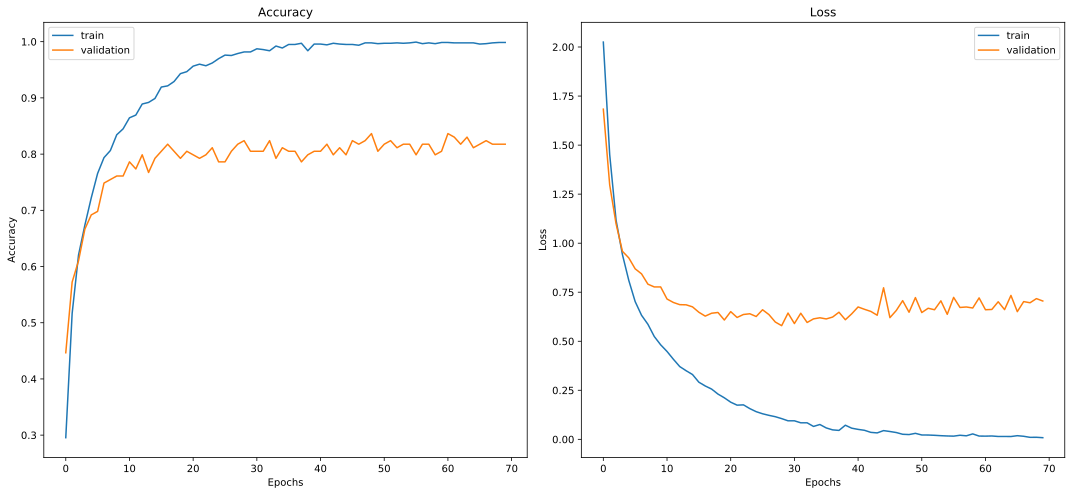

In [155]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [156]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


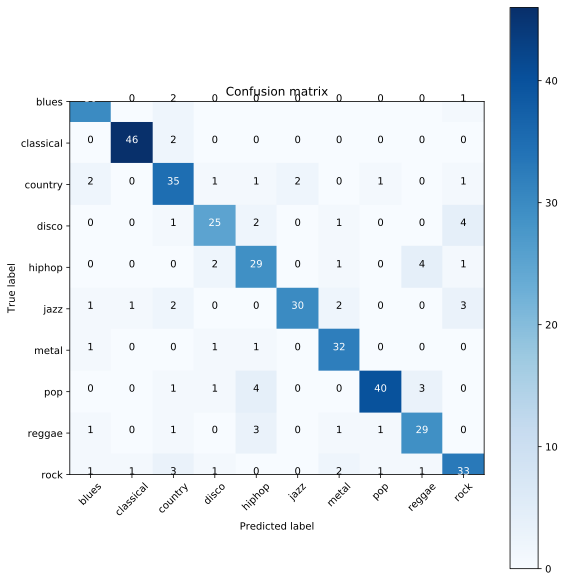

In [157]:
from sklearn.metrics import confusion_matrix
preds = np.argmax(model1.predict(X_test), axis = 1)
cm = confusion_matrix(preds,y_test)
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=False)

In [158]:
#
test_loss, test_acc = model1.evaluate(Xt1,yt1)
print(test_loss, test_acc)

10/10 [==============================] - 0s 710us/step
2.337251663208008 0.5


In [176]:
pred=model1.predict_classes(Xt2)

In [177]:
pred

array([5, 5, 1, 1, 2, 3, 3, 3, 4, 4, 5, 5, 4, 6, 7, 7, 9, 9, 9, 2])

In [186]:
pred1=model1.predict(Xt2)
pred1

array([[3.19621712e-03, 1.59660649e-05, 2.17343471e-03, 2.43958653e-09,
        1.15966486e-06, 9.58759189e-01, 2.00578314e-03, 7.65966368e-04,
        5.77865867e-03, 2.73036249e-02],
       [2.01529247e-06, 9.26474240e-06, 1.09498997e-05, 1.52937785e-09,
        2.98572218e-07, 5.90276301e-01, 1.42667163e-03, 3.31788906e-04,
        2.91097444e-04, 4.07651633e-01],
       [5.42636371e-08, 8.61937642e-01, 3.28360024e-08, 1.19361630e-05,
        2.60089866e-11, 1.38050288e-01, 1.47501178e-09, 1.96738945e-10,
        1.22708962e-16, 9.84718166e-13],
       [3.09747413e-14, 5.00557899e-01, 8.85557253e-12, 2.98736665e-12,
        1.15696696e-14, 4.99442101e-01, 1.09559715e-10, 8.11498763e-13,
        3.59845280e-19, 1.51217927e-10],
       [1.27419278e-01, 1.74486013e-05, 6.39913321e-01, 2.19807282e-01,
        3.87367280e-03, 4.18707292e-04, 1.26635784e-03, 3.13941237e-05,
        1.84656552e-03, 5.40605467e-03],
       [1.92555413e-03, 3.58940451e-06, 6.61886251e-03, 9.90165770e-01,
   

In [187]:
yt2

0     0
1     0
2     1
3     1
4     2
5     2
6     3
7     3
8     4
9     4
10    5
11    5
12    6
13    6
14    7
15    7
16    8
17    8
18    9
19    9
Name: genre, dtype: int64

In [159]:
test_loss, test_acc = model1.evaluate(Xt2,yt2)
print(test_loss, test_acc)

20/20 [==============================] - 0s 313us/step
2.3126845359802246 0.6499999761581421


In [116]:
test_loss, test_acc = model1.evaluate(X_test,y_test)
print(test_loss, test_acc)

396/396 [==============================] - 0s 92us/step
0.7854783592200039 0.8459595965616631


In [94]:
y_pred=model1.predict(Xt1)

In [179]:
import seaborn as sns

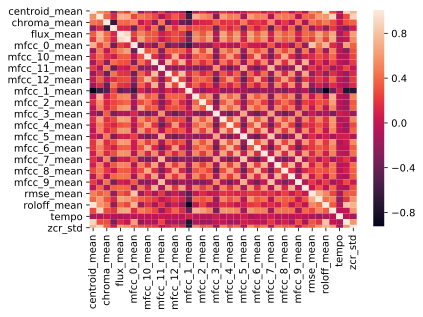

In [184]:
sns.heatmap(X.corr())